In [2]:
import pandas as pd
import numpy as np
import pathlib
from plotnine import *
from plotnine.data import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from plotnine import *

In [3]:
users = pd.read_csv('steam_users_purchase_play.csv', header=1, names=['user', 'games', 'hours', 'purchase', 'play'])
print(users)

             user                         games  hours  purchase  play
1            5250               Cities Skylines  144.0         1     1
2            5250                Counter-Strike    0.0         1     0
3            5250         Counter-Strike Source    0.0         1     0
4            5250                 Day of Defeat    0.0         1     0
5            5250            Deathmatch Classic    0.0         1     0
...           ...                           ...    ...       ...   ...
128799  309626088  Age of Empires II HD Edition    6.7         1     1
128800  309812026  Counter-Strike Nexon Zombies    0.0         1     0
128801  309812026                     Robocraft    0.0         1     0
128802  309824202                        Dota 2    0.7         1     1
128803  309903146                        Dota 2    0.2         1     1

[128803 rows x 5 columns]


In [10]:
#Grouping users datasets in terms of hours users played in a particular game
#Considering top 20 most played games by users.
game_total_hrs = users.groupby(by='games')['hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20].reset_index()
#Game with highest number of users.
game_freq = users.groupby(by='games').agg({'user':'count', 'hours':'sum'}).reset_index()
top_20_game = game_freq.sort_values(by='user', ascending=False)[:20].reset_index()
print(top_20_game)

    index                                         games  user     hours
0    1336                                        Dota 2  4841  981684.6
1    4257                               Team Fortress 2  2323  173673.3
2    4788                                      Unturned  1563   16096.4
3     981               Counter-Strike Global Offensive  1412  322771.6
4    2074                        Half-Life 2 Lost Coast   981     184.4
5     984                         Counter-Strike Source   978   96075.5
6    2475                                 Left 4 Dead 2   951   33596.7
7     978                                Counter-Strike   856  134261.1
8    4899                                      Warframe   847   27074.6
9    2071                        Half-Life 2 Deathmatch   823    3712.9
10   1894                                   Garry's Mod   731   49725.3
11   4364                    The Elder Scrolls V Skyrim   717   70889.3
12   3562                                     Robocraft   689   

In [11]:
#Manipulating the above obtained top 20 games data.
top_20_game['hours'] = top_20_game['hours'].round(1)

1. Histogram plot for top 20 games with most users.

C:\Users\User\AppData\Local\Temp\ipykernel_12020\2443657942.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator


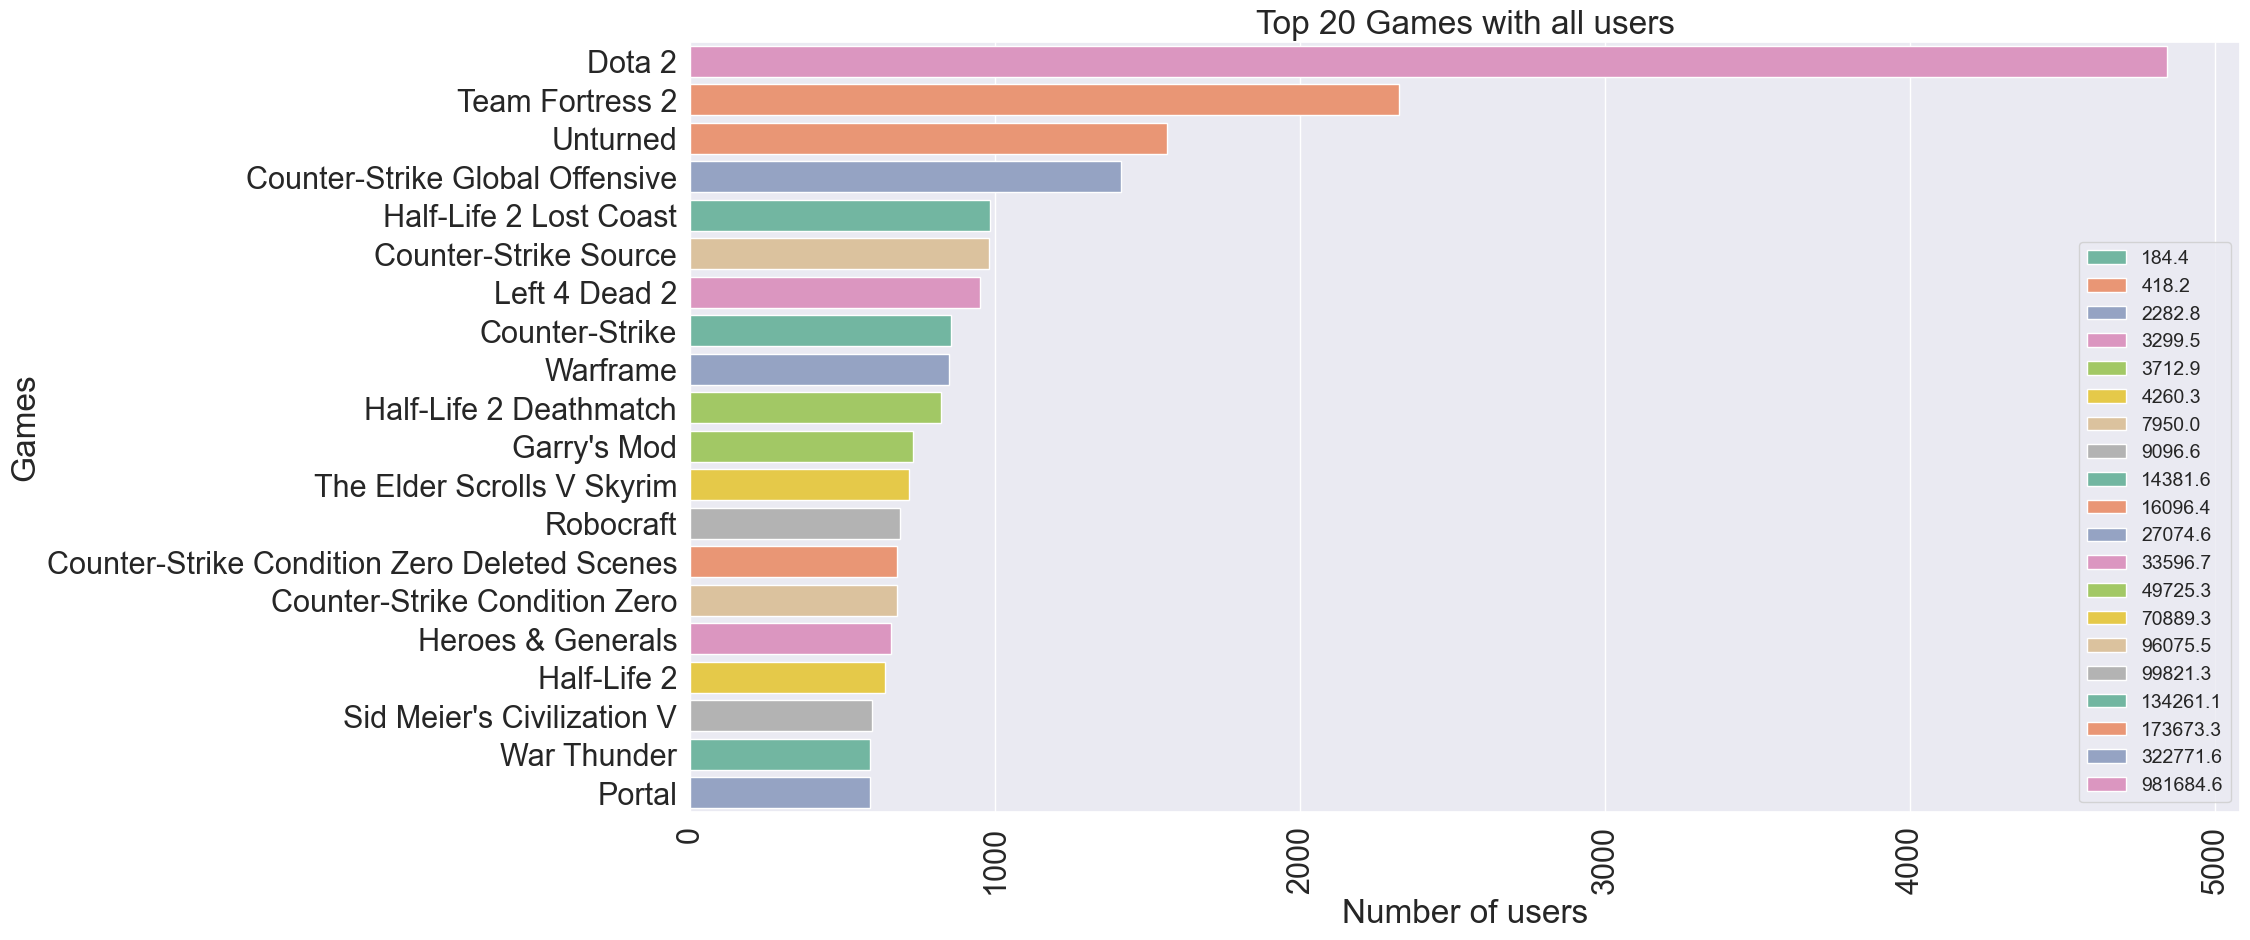

In [35]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
axis = sns.barplot(x='user', y='games', hue='hours', alpha=1, data=top_20_game, palette='Set2', dodge=False)
axis.set(xlabel='Number of users', ylabel='Games', title='Top 20 Games with all users')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
axis.legend(fontsize=14)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12020\4092227007.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator


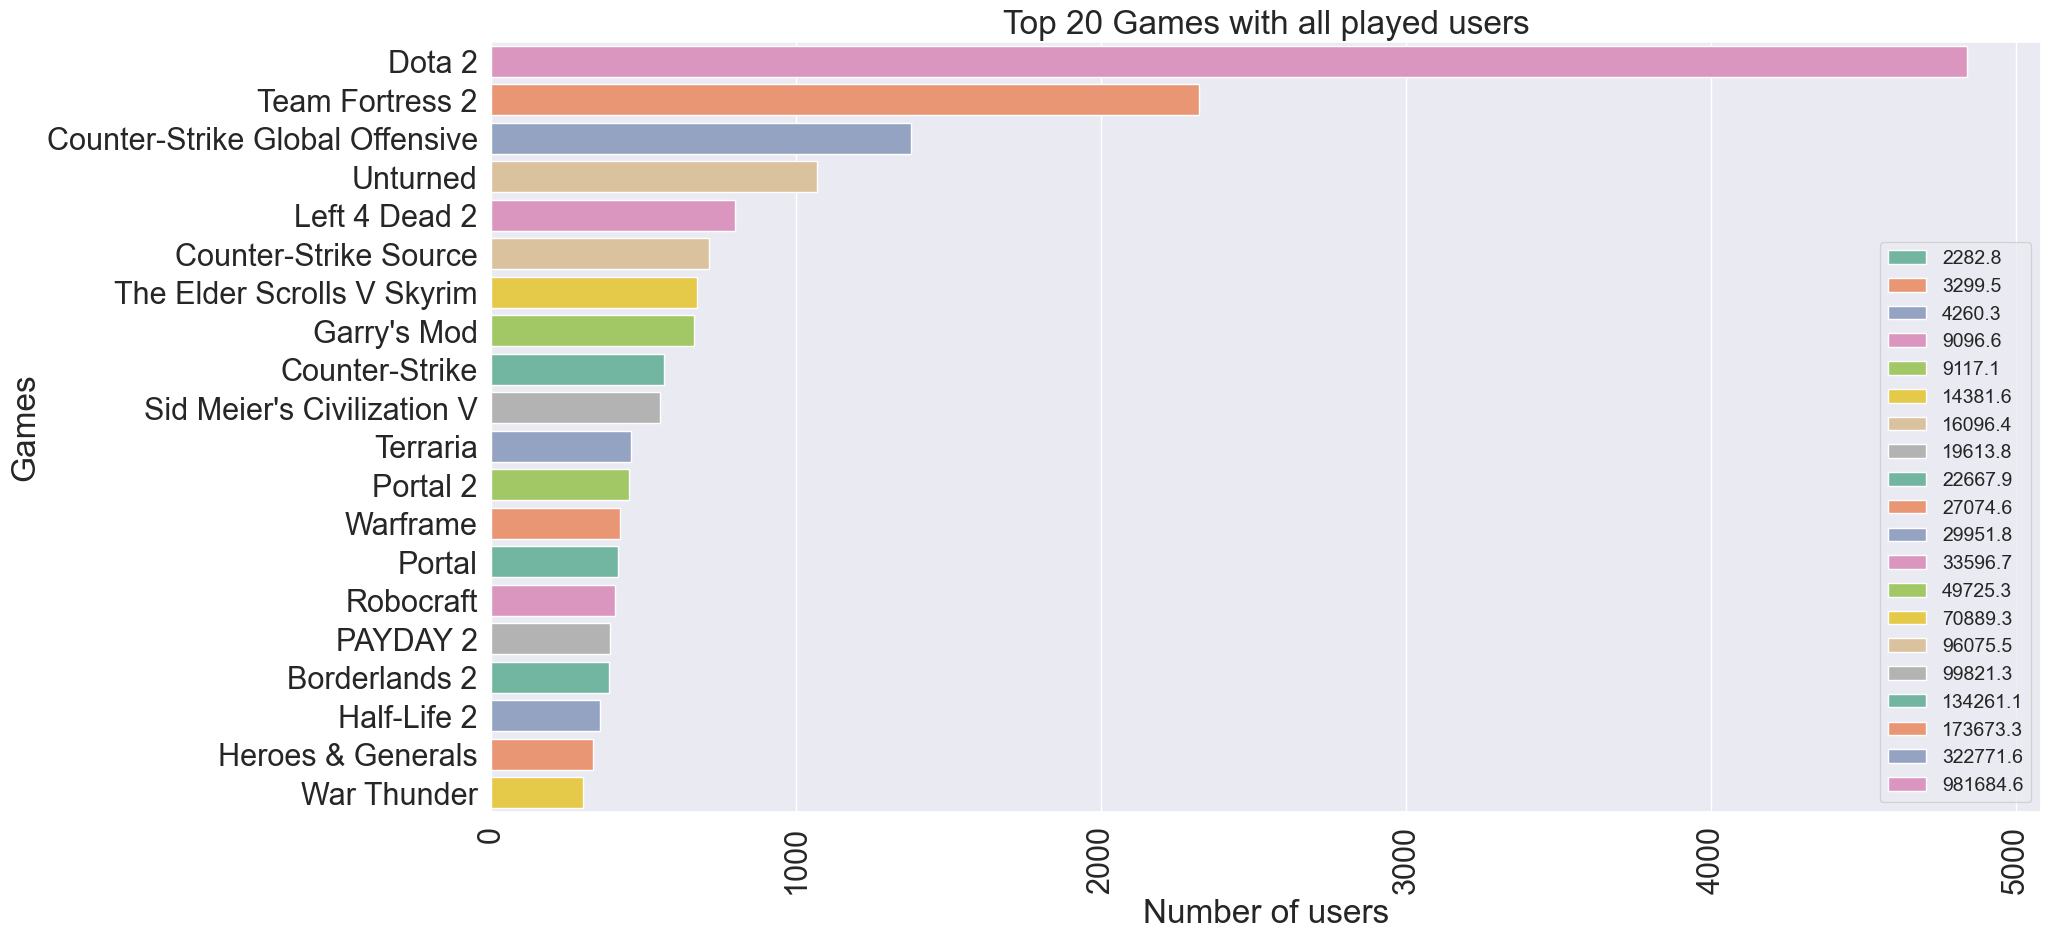

In [38]:
'''Histogram plot for top 20 games for only those users that actually played the game ,
ignoring the case that includes the user who purchased the game but never played it.'''
play_removal = users[users['play']==0].index
users.drop(play_removal, inplace=True)
game_total_hrs = users.groupby(by='games')['hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]
#Game with highest number of users
game_freq = users.groupby(by='games').agg({'user':'count', 'hours':'sum'}).reset_index()
top_20_game1 = game_freq.sort_values(by='user', ascending=False)[:20].reset_index()
top_20_game1['hours'] = top_20_game1['hours'].round(1)
plt.figure(figsize=(20,10))
sns.set(font_scale = 2)
axis = sns.barplot(x='user', y='games', hue='hours', alpha=1, data=top_20_game1, palette='Set2', dodge=False)
axis.set(xlabel='Number of users', ylabel='Games', title='Top 20 Games with all played users')
axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
axis.legend(fontsize=14)
plt.show()